# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api import TimeFrame
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv("Environment.env")

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url)
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
json.dumps(btc_response.json())

'{"data": {"1": {"id": 1, "name": "Bitcoin", "symbol": "BTC", "website_slug": "bitcoin", "rank": 1, "circulating_supply": 18946306, "total_supply": 18946306, "max_supply": 21000000, "quotes": {"USD": {"price": 38860.0, "volume_24h": 17150537744, "market_cap": 737457205542, "percentage_change_1h": 0.393273713137754, "percentage_change_24h": 0.965717253453173, "percentage_change_7d": 5.67327821066296, "percent_change_1h": 0.393273713137754, "percent_change_24h": 0.965717253453173, "percent_change_7d": 5.67327821066296}}, "last_updated": 1643758982}}, "metadata": {"timestamp": 1643758982, "num_cryptocurrencies": 3105, "error": null}}'

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url)

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
json.dumps(eth_response.json())

'{"data": {"1027": {"id": 1027, "name": "Ethereum", "symbol": "ETH", "website_slug": "ethereum", "rank": 2, "circulating_supply": 119406766, "total_supply": 119406766, "max_supply": 0, "quotes": {"USD": {"price": 2799.01, "volume_24h": 13212318014, "market_cap": 334478199717, "percentage_change_1h": 0.477405666935232, "percentage_change_24h": 4.18522420443613, "percentage_change_7d": 14.3464366432674, "percent_change_1h": 0.477405666935232, "percent_change_24h": 4.18522420443613, "percent_change_7d": 14.3464366432674}}, "last_updated": 1643758987}}, "metadata": {"timestamp": 1643758987, "num_cryptocurrencies": 3105, "error": null}}'

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response.json()["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
# YOUR CODE HERE
print(btc_price)

38860.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response.json()["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
# YOUR CODE HERE
print(eth_price)

2799.01


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins
# Print current value of your holding in BTC
# YOUR CODE HERE
print(btc_value)

46632.0


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
# YOUR CODE HERE
print(eth_value)

14834.753


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(total_crypto_wallet)

61466.753


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
api_key = os.getenv('ALPACA_API_KEY')

print(api_key)
# YOUR CODE HERE
secret_key = os.getenv('ALPACA_SECRET_KEY')

print(secret_key)
# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE

api = tradeapi.REST(api_key, secret_key, api_version = "v2")



PKCL9BMU0HJGUTRNGN7D
of3Fr8WQrqKAUuxK0mlavzw4Fz7I1fQwiJeuLo1M


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ["SPY", "AGG"]
# Set timeframe to 1D 
# YOUR CODE HERE
timeframe = "1D"
# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE
start_date =  pd.Timestamp("2022-01-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-27", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
alpaca_df = api.get_barset(tickers, timeframe, start = start_date, end = end_date).df

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
alpaca_df.head()

<ipython-input-16-58485dd2eeb2>:4: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  alpaca_df = api.get_barset(tickers, timeframe, start = start_date, end = end_date).df


AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2022-01-27 00:00:00-05:00  111.62  111.88  111.62  111.72  5836124  438.26   

                                                              
                             high     low   close     volume  
time                                                          
2022-01-27 00:00:00-05:00  441.58  429.45  431.27  136251597

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = alpaca_df['AGG']['close'][0]

# Print the AGG closing price
# YOUR CODE HERE
print(agg_close_price)

111.72


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = alpaca_df['SPY']['close'][0]

# Print the SPY closing price
# YOUR CODE HERE
print(spy_close_price)

431.27


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
# YOUR CODE HERE
print(agg_value)

22344.0


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
# YOUR CODE HERE
print(spy_value)

47439.7


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
print(total_stocks_bonds)

69783.7


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(total_portfolio)

131250.45299999998


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = [total_crypto_wallet, total_stocks_bonds]
# Review the Python list savings_data
# YOUR CODE HERE
savings_data

[61466.753, 69783.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
savings_df = pd.DataFrame(savings_data, columns = ["amount"], index = ["crypto", "stock/bond"])
# Display the savings_df DataFrame
# YOUR CODE HERE
savings_df

,amount
crypto,61466.753
stock/bond,69783.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':' Personal Savings'}, ylabel='amount'>

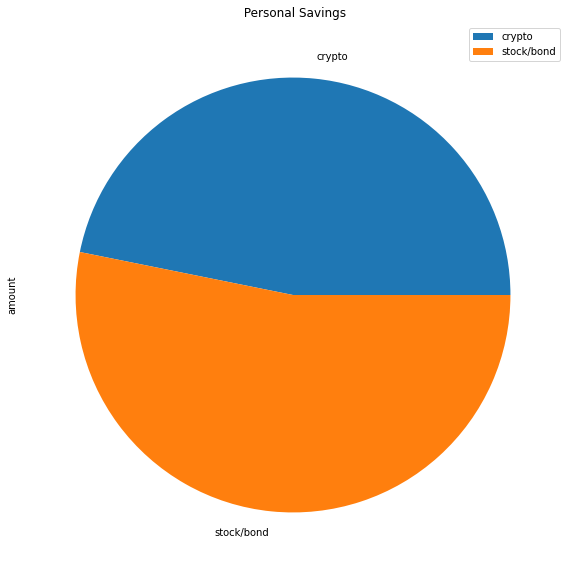

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot.pie(y = "amount", title=" Personal Savings", figsize=(10,10))

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = monthly_income * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE

if total_portfolio > emergency_fund_value:
    print("Congratulations for having enough money for your fund")
# YOUR CODE HERE
elif total_portfolio == emergency_fund_value:
    print("Congratulations for reaching this financial goal")
# YOUR CODE HERE
else:
    print(f"You have ${emergency_fund_value - total_portfolio} left to meet your financial goal")


Congratulations for having enough money for your fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
start_date = "2017-08-07"
# YOUR CODE HERE
end_date = "2020-08-07"
# Set number of rows to 1000 to retrieve the maximum amount of rows
# YOUR CODE HERE
limit = 1000

In [29]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
stock_data_df = api.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=limit).df

# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
display(stock_data_df.head())
# YOUR CODE HERE
stock_data_df.tail()

<ipython-input-29-e679ab6d5b7e>:6: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  stock_data_df = api.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=limit).df


AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2018-02-13 00:00:00-05:00  106.79  106.9100  106.7000  106.83  3689890   
2018-02-14 00:00:00-05:00  106.57  106.6600  106.4039  106.46  3695997   
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428   
2018-02-16 00:00:00-05:00  106.85  106.8750  106.7100  106.81  3391074   
2018-02-20 00:00:00-05:00  106.69  106.7099  106.5501  106.68  2372055   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2018-02-13 00:00:00-05:00  263.94  266.62  263.31  266.01  56891150  
2018-02-14 00:00:00-05:00  264.47  270.00  263.97  269.71  86705860  
2018-02-15 00:00:00-05:00  271.59  273.01  268.77  273.00  72021939  
2018-02-16 00:00:00-05:00  272.31  275.32  272.27  273.09  76314679  
2018-02-20 00:00:00-05:00  272.03  273.67  264.84  271.43  54829423

AGG                                         SPY  \
                             open      high     low   close    volume    open   
time                                                                            
2022-01-26 00:00:00-05:00  112.06  112.1300  111.36  111.36  10170465  440.72   
2022-01-27 00:00:00-05:00  111.62  111.8800  111.62  111.72   5836124  438.26   
2022-01-28 00:00:00-05:00  111.46  111.8600  111.44  111.81  10400422  432.70   
2022-01-31 00:00:00-05:00  111.64  111.8900  111.60  111.78  11437834  441.24   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.38  111.59   9477222  450.72   

                                                                 
                             high       low    close     volume  
time                                                             
2022-01-26 00:00:00-05:00  444.04  428.8600  433.450  174214548  
2022-01-27 00:00:00-05:00  441.58  429.4500  431.270  136251597  
2022-01-28 00:00:00-05:00  442.00  427.8200  441.920  142062305  
2022-01-31 00:00:00-05:00  450.28  439.8100  449.815  128202383  
2022-02-01 00:00:00-05:00  453.63  446.9384  452.960  106515279

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_simulation = MCSimulation(
    portfolio_data = stock_data_df,
    weights=[0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252 * 30)
# Review the simulation input data
# YOUR CODE HERE
MC_simulation.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2018-02-13 00:00:00-05:00  106.79  106.9100  106.7000  106.83  3689890   
2018-02-14 00:00:00-05:00  106.57  106.6600  106.4039  106.46  3695997   
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428   
2018-02-16 00:00:00-05:00  106.85  106.8750  106.7100  106.81  3391074   
2018-02-20 00:00:00-05:00  106.69  106.7099  106.5501  106.68  2372055   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-13 00:00:00-05:00          NaN  263.94  266.62  263.31  266.01   
2018-02-14 00:00:00-05:00    -0.003463  264.47  270.00  263.97  269.71   
2018-02-15 00:00:00-05:00     0.001221  271.59  273.01  268.77  273.00   
2018-02-16 00:00:00-05:00     0.002064  272.31  275.32  272.27  273.09   
2018-02-20 00:00:00-05:00    -0.001217  272.03  273.67  264.84  271.43   

                                                  
                             volume daily_return  
time                                              
2018-02-13 00:00:00-05:00  56891150          NaN  
2018-02-14 00:00:00-05:00  86705860     0.013909  
2018-02-15 00:00:00-05:00  72021939     0.012198  
2018-02-16 00:00:00-05:00  76314679     0.000330  
2018-02-20 00:00:00-05:00  54829423    -0.006079

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
MC_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005138,0.994376,1.007106,0.993867,1.003942,1.000316,1.002738,1.001638,1.001645,0.996227,...,0.997874,1.003400,1.007737,0.987340,0.999749,0.992468,0.998662,0.998218,1.001178,0.986117
2,0.987086,1.004446,1.016983,0.994970,1.011959,1.008753,1.013285,1.000280,0.995561,0.995231,...,0.999016,1.009023,1.011539,0.997493,0.999456,0.985419,0.995940,0.991665,0.995724,0.985053
3,0.986775,1.005328,1.017086,1.011290,1.025795,1.003556,1.023286,1.006402,0.996174,0.998100,...,1.007952,1.010485,1.012207,0.993609,0.991669,0.990211,0.981068,0.990611,0.995965,0.995058
4,0.988833,1.002799,1.019254,1.008930,1.038006,1.014927,1.023677,1.008959,0.998013,0.997312,...,1.014078,1.008539,1.017623,0.989133,0.990123,0.995322,1.002715,0.976247,0.989048,0.995822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.000005,17.898645,9.332358,21.600934,12.333304,15.982760,23.616858,10.243739,10.368646,9.152179,...,4.333769,59.451614,8.596506,16.181584,17.452272,5.203208,37.070283,27.816072,18.869306,8.543479
7557,8.037123,17.817153,9.253319,21.519037,12.283789,15.888638,23.347038,10.442464,10.492749,9.181559,...,4.323465,59.865481,8.528267,16.284002,17.410283,5.228588,36.953965,27.379260,19.180390,8.585582
7558,8.065106,17.847673,9.229534,21.795520,12.247306,15.848954,23.429578,10.447350,10.467417,9.132553,...,4.284537,60.594001,8.431004,16.319885,17.234445,5.254898,37.284454,27.313490,18.972821,8.722393
7559,7.994772,18.027938,9.211385,22.062290,12.267497,15.779361,23.359270,10.475193,10.441949,9.079563,...,4.353046,61.280119,8.361431,16.523218,17.253024,5.270211,37.202156,27.176056,19.287596,8.708325


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

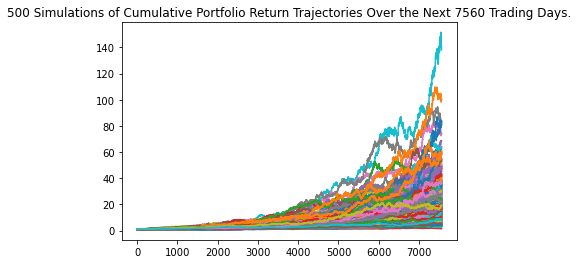

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_simulation.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

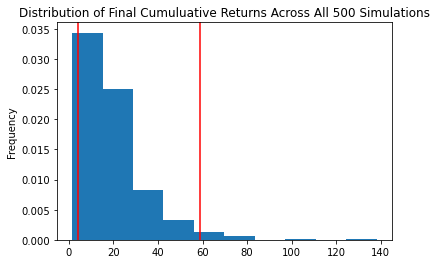

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
MC_simulation.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
summary_stat = MC_simulation.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
summary_stat

count           500.000000
mean             19.867929
std              15.000813
min               1.478481
25%               9.974416
50%              15.898099
75%              24.466290
max             138.110437
95% CI Lower      3.997143
95% CI Upper     58.704975
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(total_portfolio)

131250.45299999998


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(summary_stat[8] *total_portfolio, 0)
ci_upper_thirty_cumulative_return = round(summary_stat[9] *total_portfolio,0)

# Print the result of your calculations
# YOUR CODE HERE
print(f"Lower cumulative return: ${ci_lower_thirty_cumulative_return}, Upper Cummulative return: ${ci_upper_thirty_cumulative_return}")

Lower cumulative return: $524627.0, Upper Cummulative return: $7705055.0


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_simulation_10 = MCSimulation(
    portfolio_data = stock_data_df,
    weights=[0.2,0.8],
    num_simulation = 500,
    num_trading_days = 252 * 10)
# Review the simulation input data
# YOUR CODE HERE
MC_simulation_10.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2018-02-13 00:00:00-05:00  106.79  106.9100  106.7000  106.83  3689890   
2018-02-14 00:00:00-05:00  106.57  106.6600  106.4039  106.46  3695997   
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428   
2018-02-16 00:00:00-05:00  106.85  106.8750  106.7100  106.81  3391074   
2018-02-20 00:00:00-05:00  106.69  106.7099  106.5501  106.68  2372055   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-13 00:00:00-05:00          NaN  263.94  266.62  263.31  266.01   
2018-02-14 00:00:00-05:00    -0.003463  264.47  270.00  263.97  269.71   
2018-02-15 00:00:00-05:00     0.001221  271.59  273.01  268.77  273.00   
2018-02-16 00:00:00-05:00     0.002064  272.31  275.32  272.27  273.09   
2018-02-20 00:00:00-05:00    -0.001217  272.03  273.67  264.84  271.43   

                                                  
                             volume daily_return  
time                                              
2018-02-13 00:00:00-05:00  56891150          NaN  
2018-02-14 00:00:00-05:00  86705860     0.013909  
2018-02-15 00:00:00-05:00  72021939     0.012198  
2018-02-16 00:00:00-05:00  76314679     0.000330  
2018-02-20 00:00:00-05:00  54829423    -0.006079

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_simulation_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990031,1.003134,1.001829,1.011537,1.005836,1.000334,1.014397,1.011919,1.003457,1.020761,...,1.003191,0.995783,1.020901,0.987452,0.992452,1.013997,1.003610,1.005379,0.998757,1.023284
2,1.019080,1.013681,0.984076,1.003097,0.995018,1.010082,1.024232,1.004417,0.996317,1.008626,...,0.991501,1.030512,1.013541,0.992129,0.988131,1.017813,1.001023,1.011935,1.000743,1.031274
3,1.026043,1.014705,0.975748,1.004524,0.992541,0.994671,1.031957,0.987206,1.009585,1.024566,...,0.976349,1.037528,0.995931,0.986454,0.998018,0.995938,0.996751,1.015321,1.022325,1.059883
4,1.018961,1.026270,0.986568,1.001745,0.981161,1.002053,1.028884,0.977663,1.015310,1.047995,...,0.993953,1.045030,1.010215,0.971364,1.002543,1.005370,1.001041,1.018643,1.023454,1.062324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.848914,2.236924,2.884924,1.675706,3.217782,5.799155,4.353800,1.834791,2.911281,4.326242,...,2.857659,2.870806,3.029642,3.008751,2.715341,5.312016,2.287099,1.977341,1.646079,1.101282
2517,1.826114,2.182301,2.888541,1.712651,3.210473,5.851191,4.346427,1.860220,2.925039,4.353366,...,2.880864,2.842622,3.070484,3.049633,2.726537,5.368599,2.294687,1.987483,1.637656,1.108852
2518,1.834030,2.242079,2.970425,1.693289,3.230141,5.899004,4.397692,1.831226,2.874773,4.334293,...,2.901616,2.852261,3.043524,3.067048,2.759195,5.381939,2.305192,1.986230,1.633091,1.108437
2519,1.827402,2.262553,2.987476,1.687194,3.253636,5.959096,4.461189,1.806240,2.839614,4.332238,...,2.924158,2.879338,3.029607,3.065428,2.733591,5.397633,2.323579,1.966888,1.615312,1.121437


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

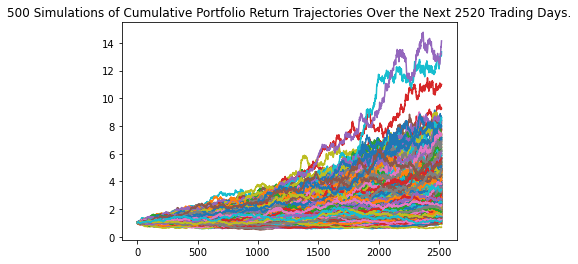

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_simulation_10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

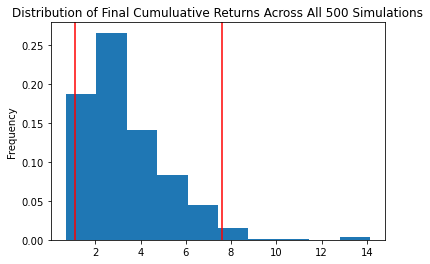

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
MC_simulation_10.plot_distribution()

In [44]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
summary_stat_10 = MC_simulation_10.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
summary_stat_10

count           500.000000
mean              3.370689
std               1.831547
min               0.695484
25%               2.036055
50%               2.957854
75%               4.294523
max              14.149222
95% CI Lower      1.108054
95% CI Upper      7.581077
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [45]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(total_portfolio)

131250.45299999998


In [46]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(summary_stat_10[8] *total_portfolio, 0)
ci_upper_ten_cumulative_return = round(summary_stat_10[9] *total_portfolio, 0)

# Print the result of your calculations
# YOUR CODE HERE
print(f"Lower cumulative return: ${ci_lower_ten_cumulative_return}, Upper Cummulative return: ${ci_upper_ten_cumulative_return}")

Lower cumulative return: $145433.0, Upper Cummulative return: $995020.0


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?